In [1]:
# Install the igraph library
library(igraph)
library(intergraph)
library(network)
library(ergm)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: ‘network’

The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, se

In [2]:

# Helper function for getting warcbase data into igraph
processFile = function(filepath) {
  con = file(filepath, "r")
  line = readLines(con)
  line <- as.data.frame(do.call(rbind, (strsplit(gsub('\\(|\\)', '', line), ','))), stringsAsFactors=FALSE)
  names(line) = c("date", "from", "to", "weight")
  return (line)
  close(con)
}


In [3]:

# Grab the data files
filepath = '~/data/links/'
file = 'ALBERTA_energy_environment'
suffix = '-links.txt'

savesuffix = '.graphml'
savepath = '~/data/graphml/'

filename = paste0(filepath, file, suffix)
savename = paste0(savepath, file, savesuffix)

graph_file <- graph.data.frame(unique(processFile(filename)[c("from", "to")]), directed=TRUE)
graph_file <- simplify(graph_file)

print(graph_file)
print(V(graph_file)$name)

IGRAPH DN-- 414 411 -- 
+ attr: name (v/c)
+ edges (vertex names):
 [1] cepa.com->capp.ca              cepa.com->plainsmidstream.com 
 [3] cepa.com->youtube.com          cepa.com->ducks.ca            
 [5] cepa.com->enform.ca            cepa.com->nrcan.gc.ca         
 [7] cepa.com->shop.csa.ca          cepa.com->wcss.ab.ca          
 [9] cepa.com->albertaonecall.com   cepa.com->canadiancga.com     
[11] cepa.com->accesspipeline.com   cepa.com->schulich.ucalgary.ca
[13] cepa.com->statcan.gc.ca        cepa.com->issuu.com           
[15] cepa.com->fortisbc.com         cepa.com->neb-one.gc.ca       
+ ... omitted several edges
  [1] "cepa.com"                             
  [2] "ceaa-acee.gc.ca"                      
  [3] "capp.ca"                              
  [4] "plainsmidstream.com"                  
  [5] "energy.ca"                            
  [6] "pm.gc.ca"                             
  [7] "greenpeace.org"                       
  [8] "youtube.com"                          
 

In [4]:
# Write the graphml
write.graph (graph_file, savename, format='graphml')

In [40]:

#Create vectors for strongly connected components, degree etc.
V(graph_file)$s_component <- clusters(graph_file, "strong")$membership
V(graph_file)$w_component <- clusters(graph_file, "weak")$membership

#print(V(graph_file)$name)
 
dist_component_id <- which(clusters(graph_file, "strong")$csize == max(clusters(graph_file, "strong")$csize))
weak_component_id <- which(clusters(graph_file, "weak")$csize == max(clusters(graph_file, "weak")$csize))

strongly_connected_graph <- induced_subgraph(graph_file, which(V(graph_file)$s_component == dist_component_id))
weakly_connected_graph <- induced_subgraph(graph_file, which(V(graph_file)$w_component == weak_component_id))

#  It may not make sense to plot the full graph if it is too large.
#  In this case, we should plot a large component.  In extreme cases,
#  We can plot just the strongly connected component.

full <- graph_file
weak <- weakly_connected_graph
strong <- strongly_connected_graph


#  Change graph_plot_name to whichever of the above you'd like to plot.

graph_plot_name <- full
V(graph_plot_name)$rlabel <- NA
V(graph_plot_name)$relevant <- FALSE
V(graph_plot_name)$wtc <- NA

V(graph_plot_name)$indegree <- degree(graph_plot_name, mode="in", loops=FALSE)
V(graph_plot_name)$outdegree <- degree(graph_plot_name, mode="out", loops=FALSE)
V(graph_plot_name)$degree <- degree(graph_plot_name, loops=FALSE)
avg_indegree <- mean(V(graph_plot_name)$indegree)
avg_outdegree <- mean(V(graph_plot_name)$outdegree)
avg_degree <- mean(V(graph_plot_name)$degree)

print (paste("Average In-degree:", avg_indegree))
print (paste("Average Out-degree:", avg_outdegree))
print (paste("Average Degree:", avg_degree))

V(graph_plot_name)$relevant <- V(graph_plot_name)$degree > avg_degree + 2
V(graph_plot_name)$rlabel[which(V(graph_plot_name)$relevant == TRUE)] <- V(graph_plot_name)$name[which(V(graph_plot_name)$relevant == TRUE)]
V(graph_plot_name)$wtc <- membership(cluster_edge_betweenness(graph_plot_name))

print(V(graph_plot_name)$rlabel[which(V(graph_plot_name)$relevant == TRUE)])


[1] "Average In-degree: 0.992753623188406"
[1] "Average Out-degree: 0.992753623188406"
[1] "Average Degree: 1.98550724637681"
 [1] "cepa.com"            "ceaa-acee.gc.ca"     "capp.ca"            
 [4] "pm.gc.ca"            "greenpeace.org"      "youtube.com"        
 [7] "npa.gc.ca"           "ducks.ca"            "enform.ca"          
[10] "state.gov"           "plus.google.com"     "accounts.google.com"
[13] "ottawacitizen.com"   "shop.csa.ca"         "neb-one.gc.ca"      
[16] "businessinsider.com" "transcanada.com"     "twitter.com"        
[19] "facebook.com"        "linkedin.com"        "google.com"         


In [26]:
# Running this code will give you the details for plotting
# in Igraph
?igraph.plotting

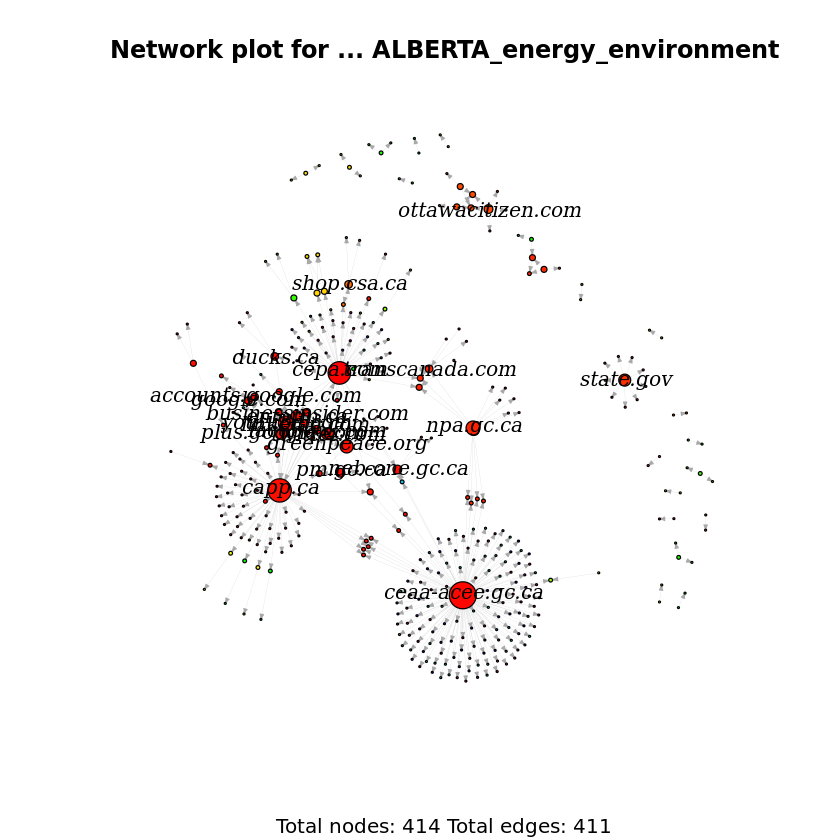

In [42]:
mems <- V(graph_plot_name)$wtc
colors <- rainbow(max(mems))

# R plots have a variety of layouts that you can choose from.
# cut and paste any of these into the "layout =" section to change the layout.
# "layout_nicely" is a good generic layout in most cases.

#  layout_nicely(graph_plot_name)
#  layout_with_sugiyama(graph_plot_name)
#  layout_as_tree(graph_plot_name)
#  layout_in_circle(graph_plot_name)
#  layout_on_grid(graph_plot_name)
#  layout_on_sphere(graph_plot_name)
#  layout_with_lgl(graph_plot_name)
#  layout_with_fr(graph_plot_name)
#  layout_with_kk(graph_plot_name)

layout = layout_with_fr(graph_plot_name)


plot(graph_plot_name, 
     main=paste("Network plot for ...", file),
     sub=paste("Total nodes:", gorder(graph_plot_name), "Total edges:", gsize(graph_plot_name)),
     layout=layout, 
     vertex.size=log(V(graph_plot_name)$degree)*2, 
     vertex.label=V(graph_plot_name)$rlabel, 
     vertex.color=colors[mems],
     vertex.frame.color = "black",
     vertex.label.color="black", 
     vertex.label.font=3,
     vertex.label.cex=1,
     vertex.label.dist=0,
     vertex.shape = "circle", # can be “circle”, “square”, “csquare”, 
       #“rectangle”, “crectangle”, “vrectangle”, “pie”, ‘sphere’, and “none”
     edge.width=0.1, 
     edge.arrow.size=0.2, 
     edge.arrow.width=1,
     edge.lty=1,  #0 and “blank” mean no edges, 
     #1 and “solid” are for solid lines, the other possible values are: 
     #2 (“dashed”), 3 (“dotted”), 4 (“dotdash”), 5 (“longdash”), 6 (“twodash”)
    )